# **Supermarket Sales Project**

## 1. Load and Preview the Dataset

In [95]:
import pandas as pd
import numpy as np

In [96]:
df = pd.read_csv('supermarket_sales.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [98]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


## 2. Clean Column Names

In [99]:
def clean_column_names(df):
    cols = df.columns
    new_cols = []
    for col in cols:
        new_col = col.lower().replace(' ', '_').replace('%', 'percent').replace('.', '')
        new_cols.append(new_col)
    df.columns = new_cols
    return df

In [100]:
df = clean_column_names(df)
df.head()

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5percent,total,date,time,payment,cogs,gross_margin_percentage,gross_income,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


## 3. Convert Date and Time Columns

In [101]:
df['date'] = pd.to_datetime(df['date'])

In [102]:
print(df['date'].dtype)

datetime64[ns]


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   invoice_id               1000 non-null   object        
 1   branch                   1000 non-null   object        
 2   city                     1000 non-null   object        
 3   customer_type            1000 non-null   object        
 4   gender                   1000 non-null   object        
 5   product_line             1000 non-null   object        
 6   unit_price               1000 non-null   float64       
 7   quantity                 1000 non-null   int64         
 8   tax_5percent             1000 non-null   float64       
 9   total                    1000 non-null   float64       
 10  date                     1000 non-null   datetime64[ns]
 11  time                     1000 non-null   object        
 12  payment                  1000 non-n

In [104]:
df.head()

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5percent,total,date,time,payment,cogs,gross_margin_percentage,gross_income,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [105]:
df['time'] = pd.to_datetime(df['time'], format='%H:%M').dt.hour

In [106]:
print(df['time'].dtype)

int32


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   invoice_id               1000 non-null   object        
 1   branch                   1000 non-null   object        
 2   city                     1000 non-null   object        
 3   customer_type            1000 non-null   object        
 4   gender                   1000 non-null   object        
 5   product_line             1000 non-null   object        
 6   unit_price               1000 non-null   float64       
 7   quantity                 1000 non-null   int64         
 8   tax_5percent             1000 non-null   float64       
 9   total                    1000 non-null   float64       
 10  date                     1000 non-null   datetime64[ns]
 11  time                     1000 non-null   int32         
 12  payment                  1000 non-n

In [108]:
df.head()

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5percent,total,date,time,payment,cogs,gross_margin_percentage,gross_income,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10,Ewallet,604.17,4.761905,30.2085,5.3


## 4. Create Time-Based Features

In [109]:
df['day_of_week'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month_name()
df['week_number'] = df['date'].dt.isocalendar().week.astype(int)

In [110]:
df[['date', 'time', 'day_of_week', 'month', 'week_number']].head()

,date,time,day_of_week,month,week_number
0,2019-01-05,13,Saturday,January,1
1,2019-03-08,10,Friday,March,10
2,2019-03-03,13,Sunday,March,9
3,2019-01-27,20,Sunday,January,4
4,2019-02-08,10,Friday,February,6


## 5. Handle Missing Values

In [111]:
print(df.isnull().sum())

invoice_id                 0
branch                     0
city                       0
customer_type              0
gender                     0
product_line               0
unit_price                 0
quantity                   0
tax_5percent               0
total                      0
date                       0
time                       0
payment                    0
cogs                       0
gross_margin_percentage    0
gross_income               0
rating                     0
day_of_week                0
month                      0
week_number                0
dtype: int64


In [112]:
print(df.duplicated().sum())

0


## 6. summary Statistics by Category

### Group by City

In [114]:
city_stats = df.groupby('city').agg(
                                    total_sales=('total', 'sum'),
                                    average_rating=('rating', 'mean'),
                                    transaction_count=('invoice_id', 'count')).sort_values(by='total_sales', ascending=False).reset_index()

In [144]:
city_stats

,city,total_sales,average_rating,transaction_count
0,Naypyitaw,110568.7065,7.072866,328
1,Yangon,106200.3705,7.027059,340
2,Mandalay,106197.6720,6.818072,332


### Group by Product line

In [116]:
product_line_stats = df.groupby('product_line').agg(
                                                    total_sales=('total', 'sum'),
                                                    average_rating=('rating', 'mean'),
                                                    transaction_count=('invoice_id', 'count')).sort_values(by='total_sales', ascending=False).reset_index()

In [145]:
product_line_stats

,product_line,total_sales,average_rating,transaction_count
0,Food and beverages,56144.8440,7.113218,174
1,Sports and travel,55122.8265,6.916265,166
2,Electronic accessories,54337.5315,6.924706,170
3,Fashion accessories,54305.8950,7.029213,178
4,Home and lifestyle,53861.9130,6.837500,160
5,Health and beauty,49193.7390,7.003289,152


## 7. Analyze Sales Trends Over Time

### Daily Sales Trend

In [124]:
daily_sales = df.groupby('date')['total'].sum().reset_index()

In [146]:
daily_sales

,date,total
0,2019-01-01,4745.1810
1,2019-01-02,1945.5030
2,2019-01-03,2078.1285
3,2019-01-04,1623.6885
4,2019-01-05,3536.6835
...,...,...
84,2019-03-26,1962.5130
85,2019-03-27,2902.8195
86,2019-03-28,2229.4020
87,2019-03-29,4023.2430


In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

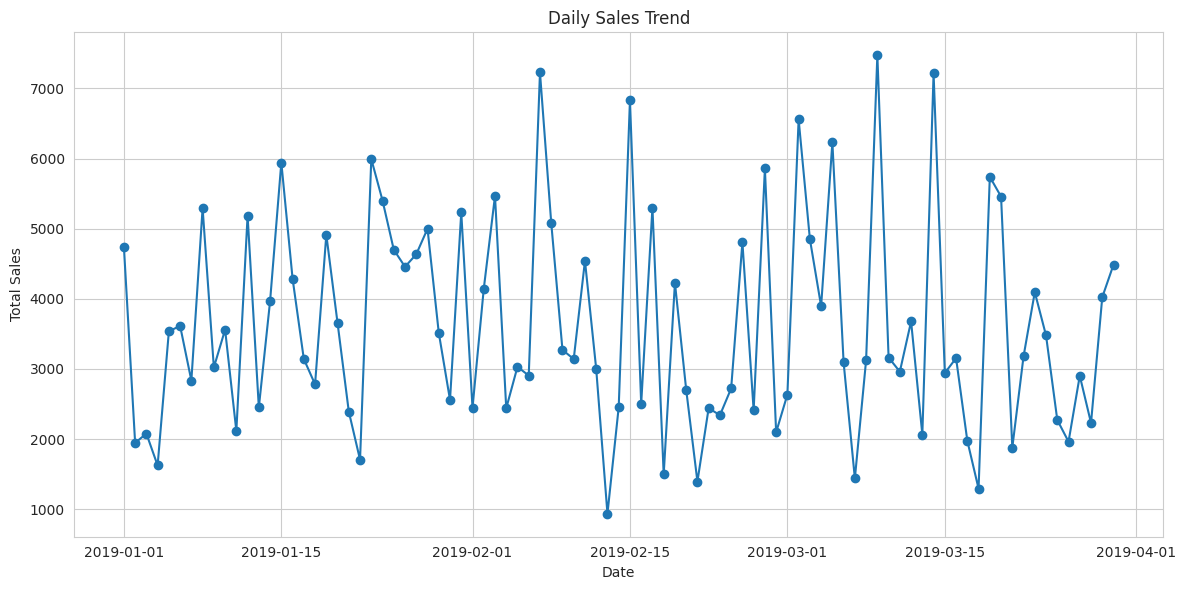

In [127]:
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['date'], daily_sales['total'], marker='o', linestyle='-')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

### Monthly Sales Trend

In [128]:
monthly_sales = df.groupby('month')['total'].sum().reindex([
                                                            'January', 'February', 'March']).sort_values(ascending=False).reset_index()

In [129]:
monthly_sales

,month,total
0,January,116291.868
1,March,109455.507
2,February,97219.374


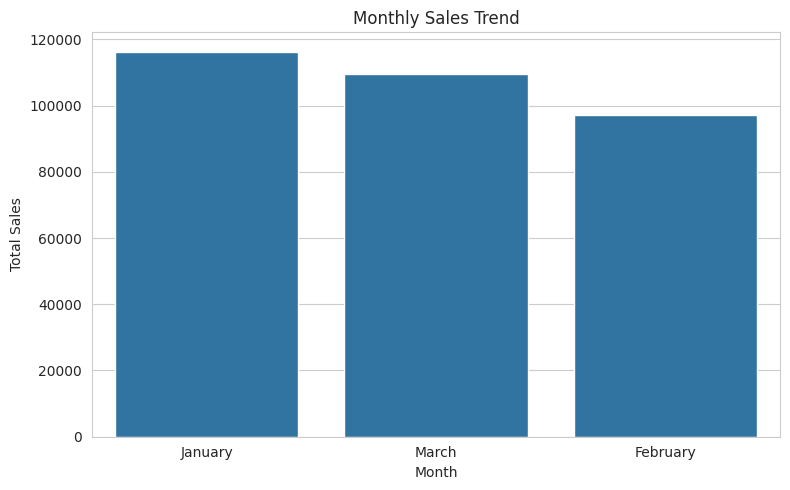

In [135]:
plt.figure(figsize=(8, 5))
sns.barplot(x='month', y='total', data=monthly_sales)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

## 8. Analyze Sales by Hour

In [136]:
sales_by_hour = df.groupby('time')['total'].sum().sort_values(ascending=False).reset_index()

In [137]:
sales_by_hour

,time,total
0,19,39699.5130
1,13,34723.2270
2,10,31421.4810
3,15,31179.5085
4,14,30828.3990
5,11,30377.3295
6,12,26065.8825
7,18,26030.3400
8,16,25226.3235
9,17,24445.2180


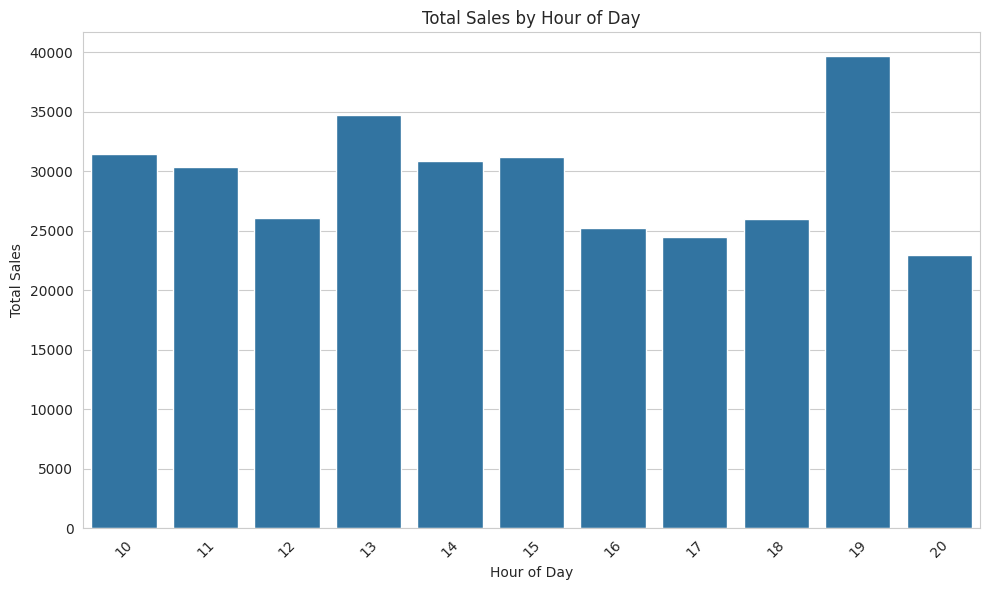

In [139]:
plt.figure(figsize=(10, 6))
sns.barplot(x='time', y='total', data=sales_by_hour)
plt.title('Total Sales by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 9. Compare Spending by Gender

In [140]:
spending_by_gender = df.groupby('gender')['total'].sum().sort_values(ascending=False).reset_index()

In [141]:
spending_by_gender

,gender,total
0,Female,167882.925
1,Male,155083.824


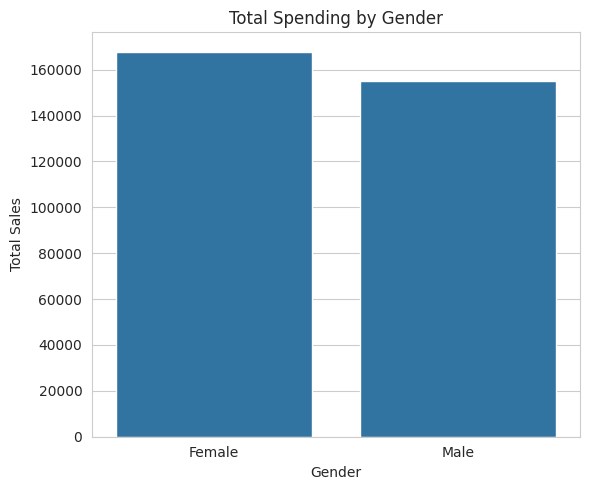

In [142]:
plt.figure(figsize=(6, 5))
sns.barplot(x='gender', y='total', data=spending_by_gender)
plt.title('Total Spending by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

## 10. Analyze Product Ratings

In [147]:
avg_rating_by_product = df.groupby('product_line')['rating'].mean().sort_values(ascending=False).reset_index()

In [148]:
avg_rating_by_product

,product_line,rating
0,Food and beverages,7.113218
1,Fashion accessories,7.029213
2,Health and beauty,7.003289
3,Electronic accessories,6.924706
4,Sports and travel,6.916265
5,Home and lifestyle,6.837500


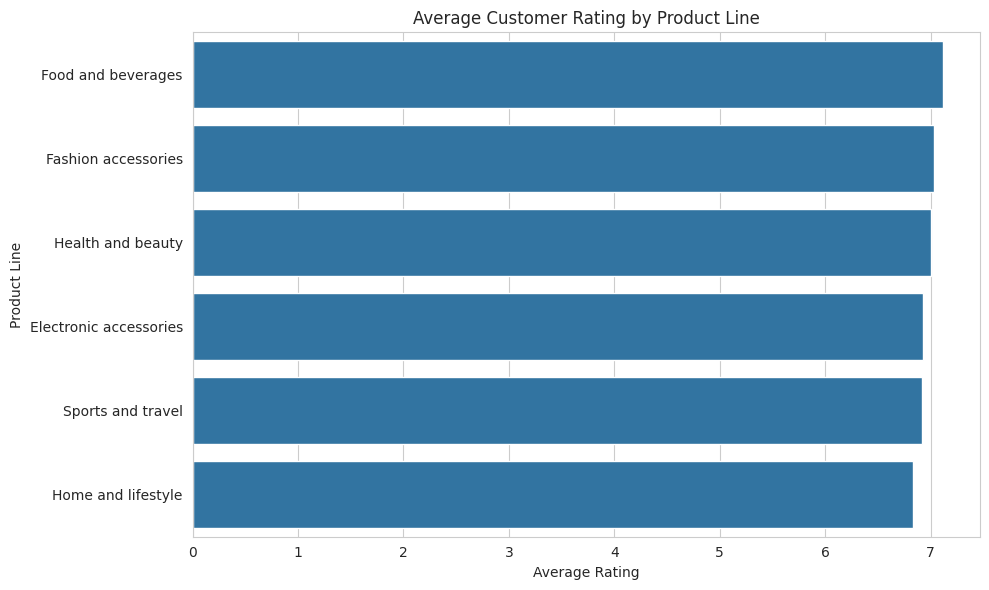

In [149]:
plt.figure(figsize=(10, 6))
sns.barplot(x='rating', y='product_line', data=avg_rating_by_product)
plt.title('Average Customer Rating by Product Line')
plt.xlabel('Average Rating')
plt.ylabel('Product Line')
plt.tight_layout()
plt.show()

## 11. Analyze Payment Method Distribution

In [150]:
payment_distribution = df.groupby('payment')['total'].sum().sort_values(ascending=False).reset_index()

In [151]:
payment_distribution

,payment,total
0,Cash,112206.570
1,Ewallet,109993.107
2,Credit card,100767.072


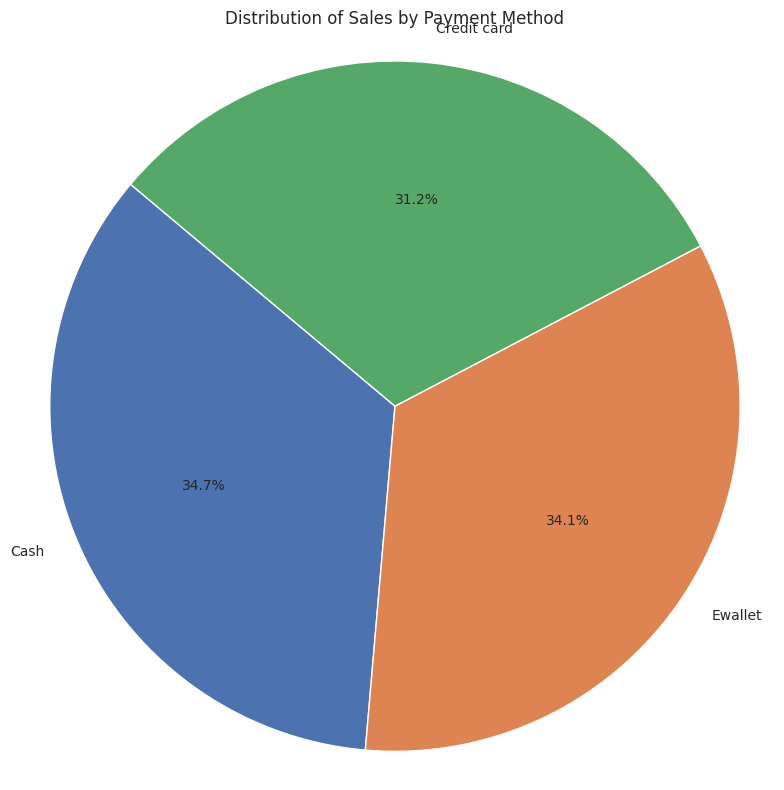

In [152]:
plt.figure(figsize=(8, 8))
plt.pie(payment_distribution['total'], labels=payment_distribution['payment'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('deep'))
plt.title('Distribution of Sales by Payment Method')
plt.axis('equal')
plt.tight_layout()
plt.show()

## 12. Calculate Custom Metrics

In [153]:
# Assuming a fixed profit margin of 15% for demonstration
df['estimated_profit'] = df['total'] * 0.15

In [154]:
df.head()

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5percent,total,...,time,payment,cogs,gross_margin_percentage,gross_income,rating,day_of_week,month,week_number,estimated_profit
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,13,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,January,1,82.345725
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,10,Cash,76.40,4.761905,3.8200,9.6,Friday,March,10,12.033000
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,13,Credit card,324.31,4.761905,16.2155,7.4,Sunday,March,9,51.078825
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,20,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,January,4,73.357200
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,10,Ewallet,604.17,4.761905,30.2085,5.3,Friday,February,6,95.156775


In [155]:
df.columns

Index(['invoice_id', 'branch', 'city', 'customer_type', 'gender',
       'product_line', 'unit_price', 'quantity', 'tax_5percent', 'total',
       'date', 'time', 'payment', 'cogs', 'gross_margin_percentage',
       'gross_income', 'rating', 'day_of_week', 'month', 'week_number',
       'estimated_profit'],
      dtype='object')

In [156]:
df[['total', 'estimated_profit']].head()

,total,estimated_profit
0,548.9715,82.345725
1,80.2200,12.033000
2,340.5255,51.078825
3,489.0480,73.357200
4,634.3785,95.156775


In [157]:
print(f"\nTotal Estimated Profit: {df['estimated_profit'].sum():.2f}")


Total Estimated Profit: 48445.01


## 13. Identify Top Product Lines

### Product Line by Total Revenue

In [158]:
top_product_lines_revenue = df.groupby('product_line')['total'].sum().sort_values(ascending=False).reset_index()

In [159]:
top_product_lines_revenue

,product_line,total
0,Food and beverages,56144.8440
1,Sports and travel,55122.8265
2,Electronic accessories,54337.5315
3,Fashion accessories,54305.8950
4,Home and lifestyle,53861.9130
5,Health and beauty,49193.7390


Text(0, 0.5, 'Product Line')

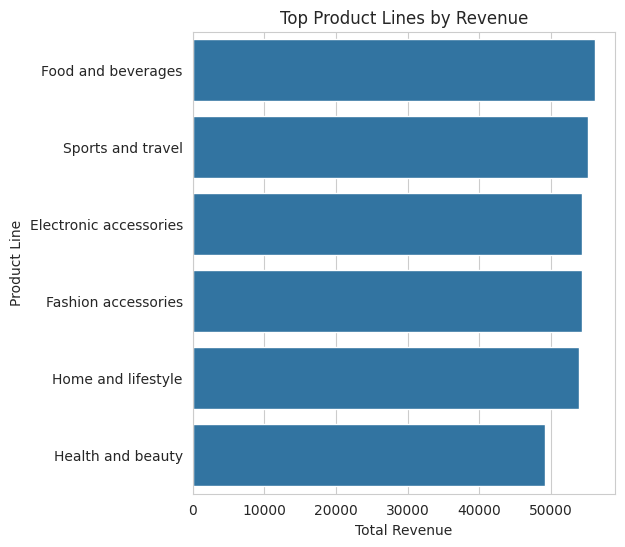

In [160]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='total', y='product_line', data=top_product_lines_revenue)
plt.title('Top Product Lines by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product Line')

### Product Line by Quantity Sold

In [161]:
top_product_lines_quantity = df.groupby('product_line')['quantity'].sum().sort_values(ascending=False).reset_index()

In [162]:
top_product_lines_quantity

,product_line,quantity
0,Electronic accessories,971
1,Food and beverages,952
2,Sports and travel,920
3,Home and lifestyle,911
4,Fashion accessories,902
5,Health and beauty,854


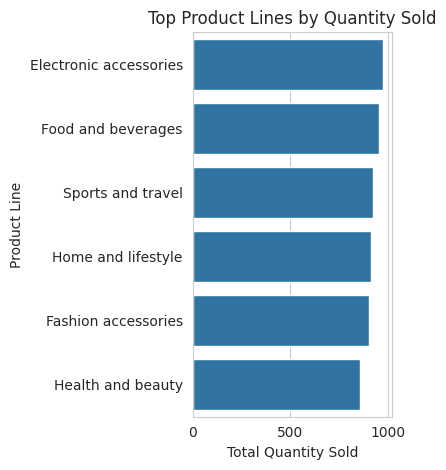

In [163]:
plt.subplot(1, 2, 2)
sns.barplot(x='quantity', y='product_line', data=top_product_lines_quantity)
plt.title('Top Product Lines by Quantity Sold')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Line')
plt.tight_layout()
plt.show()

## 14. Check for Correlations

In [164]:
numerical_cols = ['unit_price', 'quantity', 'tax_5percent', 'total', 'cogs', 'gross_income', 'rating']
correlation_matrix = df[numerical_cols].corr()

In [165]:
correlation_matrix

,unit_price,quantity,tax_5percent,total,cogs,gross_income,rating
unit_price,1.000000,0.010778,0.633962,0.633962,0.633962,0.633962,-0.008778
quantity,0.010778,1.000000,0.705510,0.705510,0.705510,0.705510,-0.015815
tax_5percent,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
total,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
gross_income,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,-0.036442,1.000000


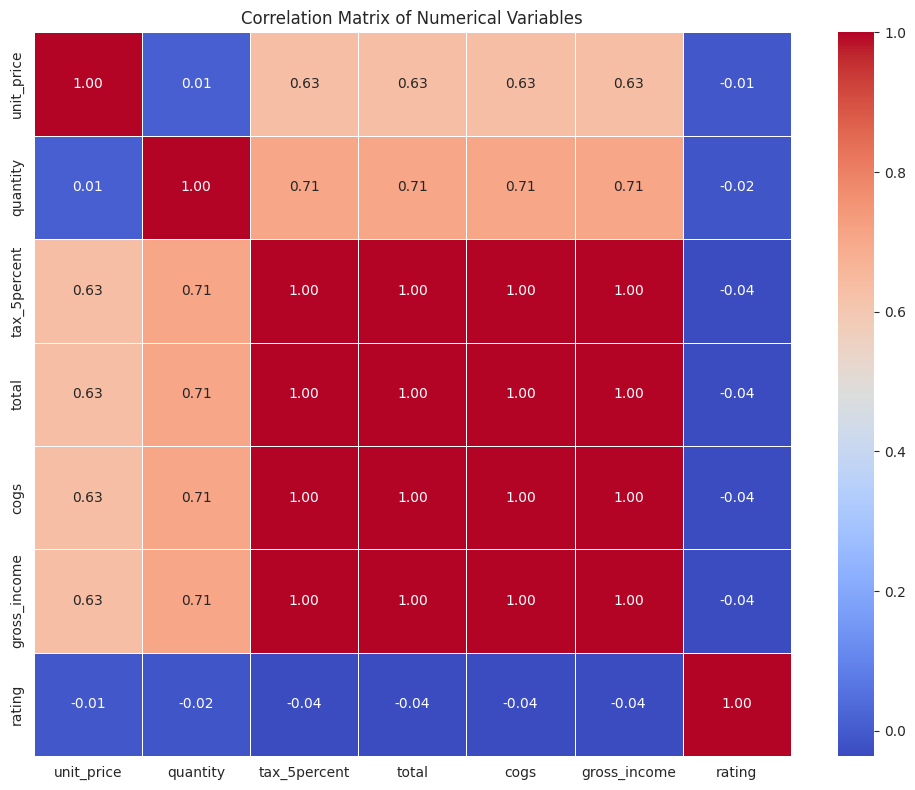

In [166]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()

## 15. Additional Useful Data Analysis

### Sales by Customer Type

In [167]:
sales_by_customer_type = df.groupby('customer_type')['total'].sum().sort_values(ascending=False).reset_index()

In [169]:
sales_by_customer_type

,customer_type,total
0,Member,164223.444
1,Normal,158743.305


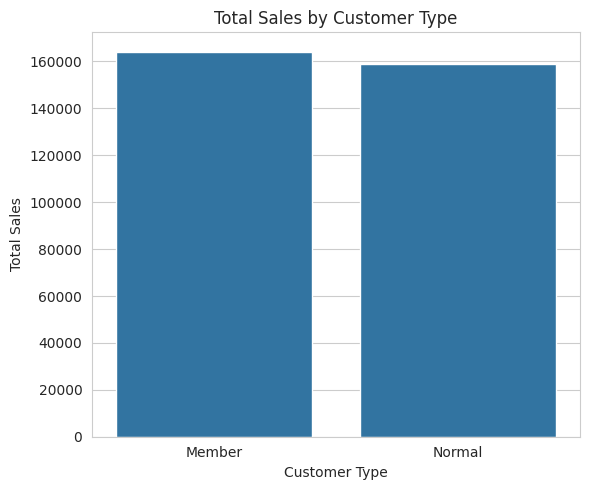

In [170]:
plt.figure(figsize=(6, 5))
sns.barplot(x='customer_type', y='total', data=sales_by_customer_type)
plt.title('Total Sales by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

### Sales by Branch

In [171]:
sales_by_branch = df.groupby('branch')['total'].sum().sort_values(ascending=False).reset_index()

In [172]:
sales_by_branch

,branch,total
0,C,110568.7065
1,A,106200.3705
2,B,106197.6720


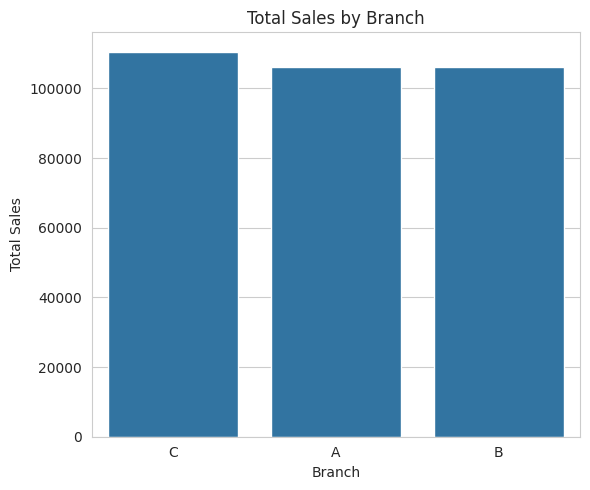

In [173]:
plt.figure(figsize=(6, 5))
sns.barplot(x='branch', y='total', data=sales_by_branch)
plt.title('Total Sales by Branch')
plt.xlabel('Branch')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

### Sales by Day of Week

In [174]:
sales_by_day_of_week = df.groupby('day_of_week')['total'].sum().reindex([
                                                                          'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()

In [175]:
sales_by_day_of_week

,day_of_week,total
0,Monday,37899.0780
1,Tuesday,51482.2455
2,Wednesday,43731.1350
3,Thursday,45349.2480
4,Friday,43926.3405
5,Saturday,56120.8095
6,Sunday,44457.8925


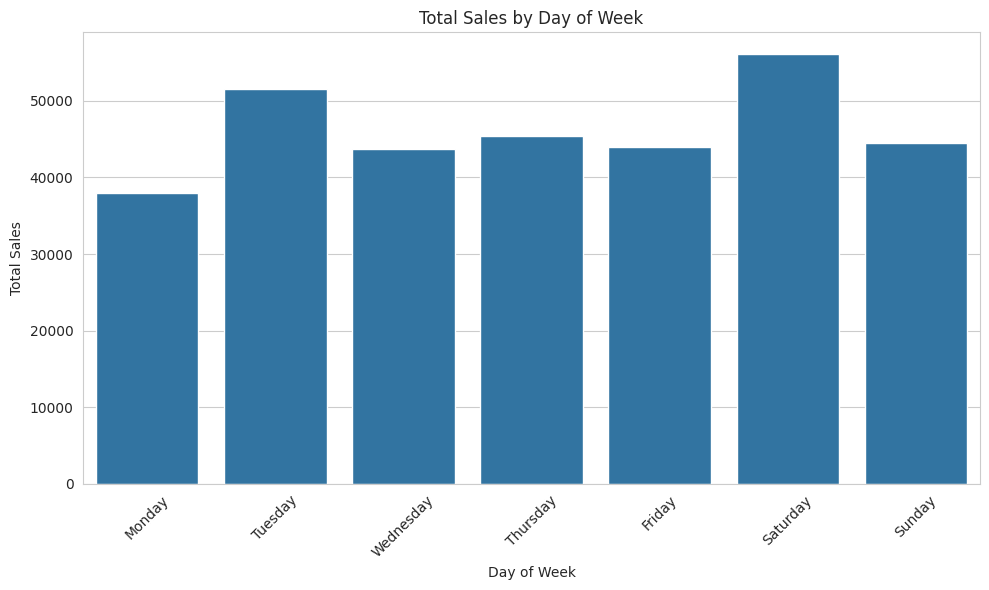

In [176]:
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='total', data=sales_by_day_of_week)
plt.title('Total Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Analyze Rating Distribution

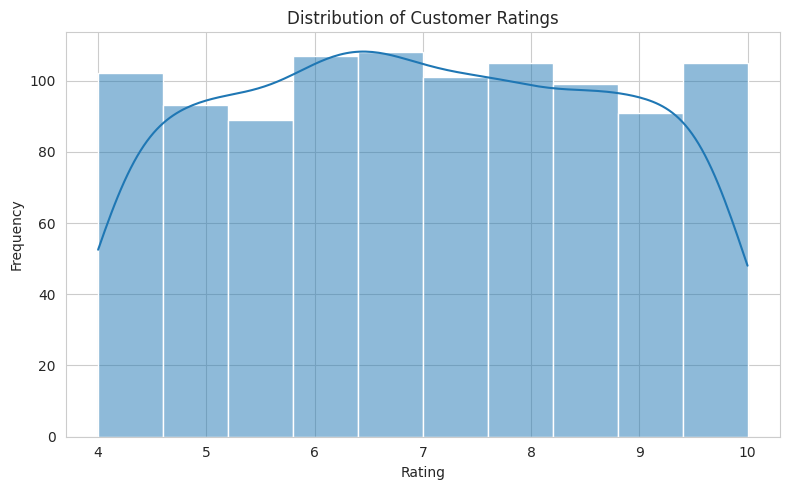

In [177]:
plt.figure(figsize=(8, 5))
sns.histplot(df['rating'], bins=10, kde=True)
plt.title('Distribution of Customer Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()